# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy    

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | medina
Processing Record 2 of Set 1 | tutong
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ankazoabo
Processing Record 5 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | lerwick
Processing Record 8 of Set 1 | strezhevoy
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | owo
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | carinhanha
Processing Record 21 of Set 1 | college
Processing Record 22 o

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,medina,24.4686,39.6142,294.39,19,0,1.03,SA,1712889535
1,tutong,4.8000,114.6500,305.20,61,7,1.95,BN,1712889702
2,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712889434
3,ankazoabo,-22.2833,44.5167,292.12,87,96,4.01,MG,1712889703
4,west island,-12.1568,96.8225,302.14,74,40,3.60,CC,1712889347


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,medina,24.4686,39.6142,294.39,19,0,1.03,SA,1712889535
1,tutong,4.8000,114.6500,305.20,61,7,1.95,BN,1712889702
2,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712889434
3,ankazoabo,-22.2833,44.5167,292.12,87,96,4.01,MG,1712889703
4,west island,-12.1568,96.8225,302.14,74,40,3.60,CC,1712889347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

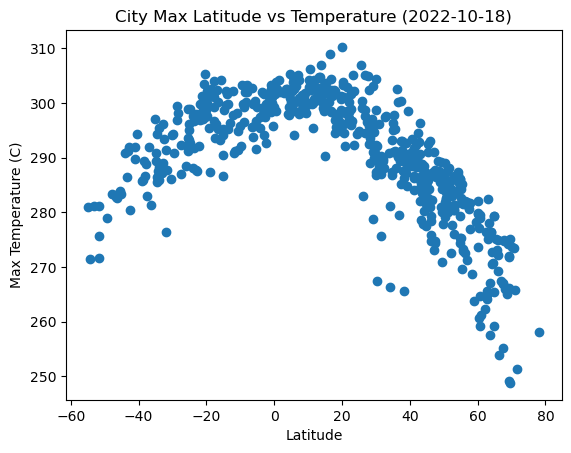

In [11]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.set_title('City Max Latitude vs Temperature (2022-10-18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (C)')
ax.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

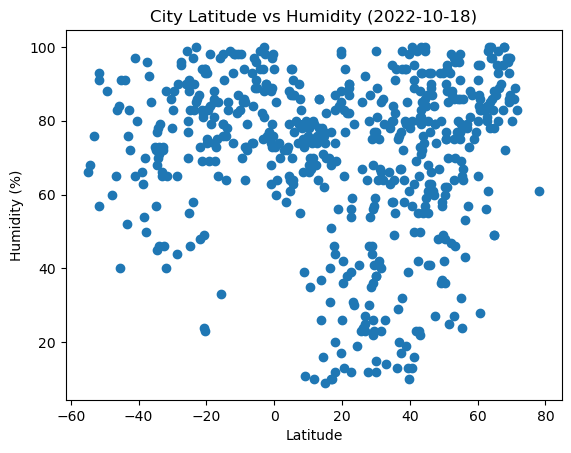

In [12]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.set_title('City Latitude vs Humidity (2022-10-18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

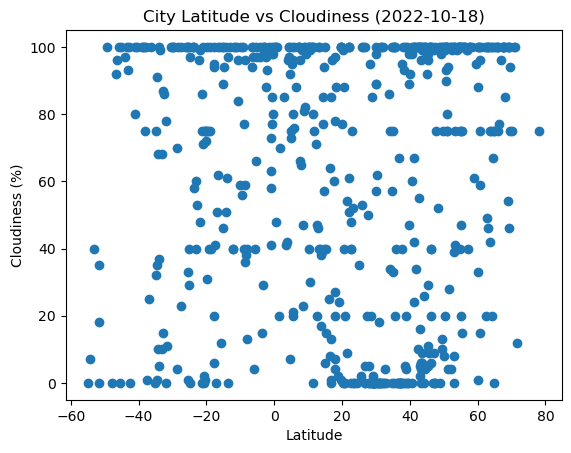

In [13]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.set_title('City Latitude vs Cloudiness (2022-10-18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

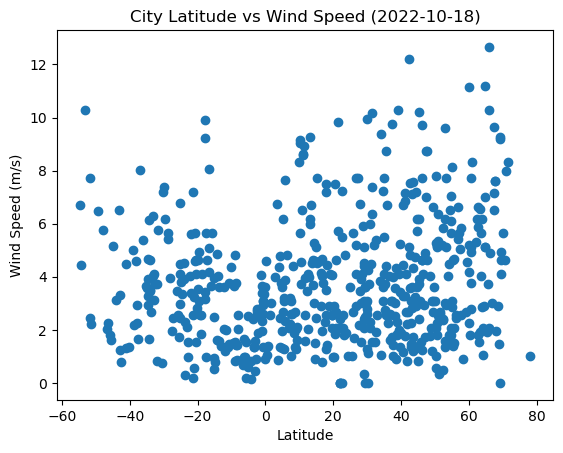

In [14]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.set_title('City Latitude vs Wind Speed (2022-10-18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(r"C:\Users\ccana\Downloads\Starter_Code (15)\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")



In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,medina,24.4686,39.6142,294.39,19,0,1.03,SA,1712889535
1,tutong,4.8000,114.6500,305.20,61,7,1.95,BN,1712889702
5,lerwick,60.1545,-1.1494,282.15,91,88,11.14,GB,1712889607
6,strezhevoy,60.7333,77.5889,259.24,83,96,4.92,RU,1712889704
10,gadzhiyevo,69.2551,33.3362,271.93,85,100,9.28,RU,1712889195


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,279.02,88,100,6.48,TF,1712889434
3,ankazoabo,-22.2833,44.5167,292.12,87,96,4.01,MG,1712889703
4,west island,-12.1568,96.8225,302.14,74,40,3.60,CC,1712889347
7,puerto natales,-51.7236,-72.4875,275.72,91,18,2.43,CL,1712889449
8,hermanus,-34.4187,19.2345,285.82,78,68,6.12,ZA,1712889483


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8629835120875433


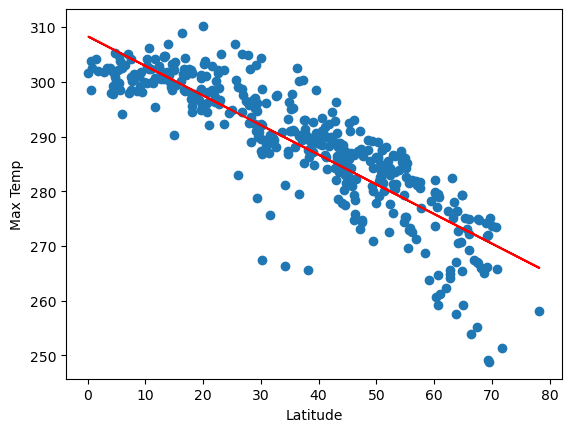

In [26]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
slope, intercept, r, p, se = linregress(north_lat, north_temp)


fig, ax = plt.subplots()
print(f"The r-value is: {r}")
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_temp)


The r-value is: 0.7591913782600129


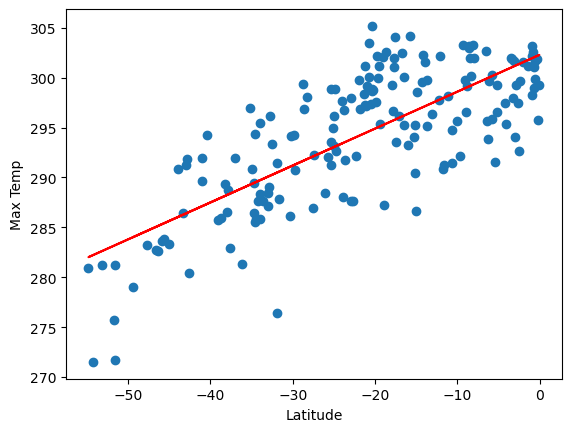

In [27]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_temp = southern_hemi_df['Max Temp']
slope, intercept, r, p, se = linregress(southern_lat, southern_temp)


fig, ax = plt.subplots()
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.plot(southern_lat, slope * southern_lat + intercept, color= 'red')
ax.scatter(southern_lat, southern_temp)
print(f"The r-value is: {r}")






**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23518442967133998


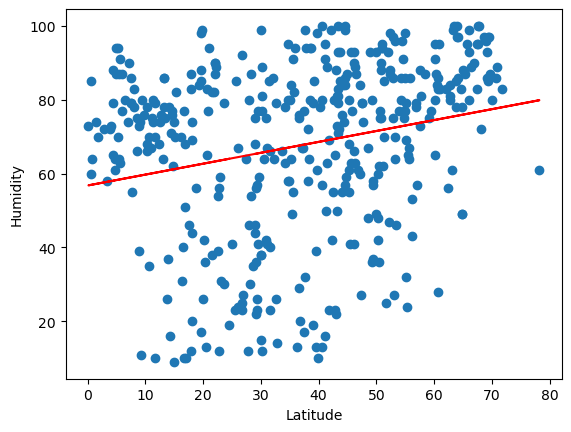

In [31]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_humidity = northern_hemi_df['Humidity']
slope, intercept, r, p, se = linregress(north_lat, north_humidity)


fig, ax = plt.subplots()
print(f"The r-value is: {r}")
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_humidity)

The r-value is: 0.28826219962154187


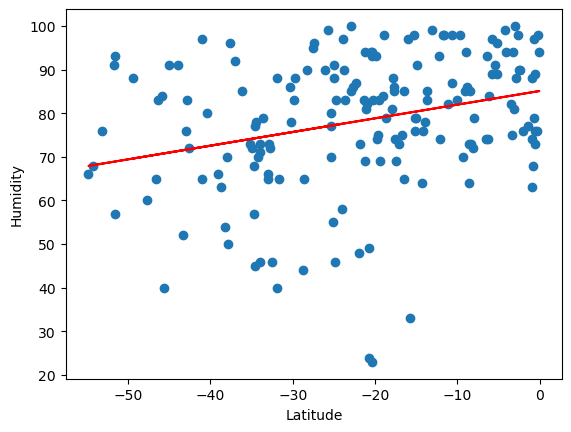

In [32]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_humidity = southern_hemi_df['Humidity']
slope, intercept, r, p, se = linregress(southern_lat, southern_humidity)


fig, ax = plt.subplots()
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.plot(southern_lat, slope * southern_lat + intercept, color= 'red')
ax.scatter(southern_lat, southern_humidity)
print(f"The r-value is: {r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14174045314766187


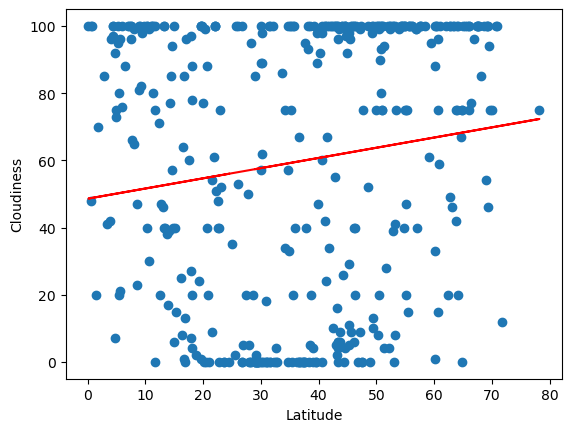

In [33]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cloudiness = northern_hemi_df['Cloudiness']
slope, intercept, r, p, se = linregress(north_lat, north_cloudiness)


fig, ax = plt.subplots()
print(f"The r-value is: {r}")
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_cloudiness)

The r-value is: 0.21158743440955932


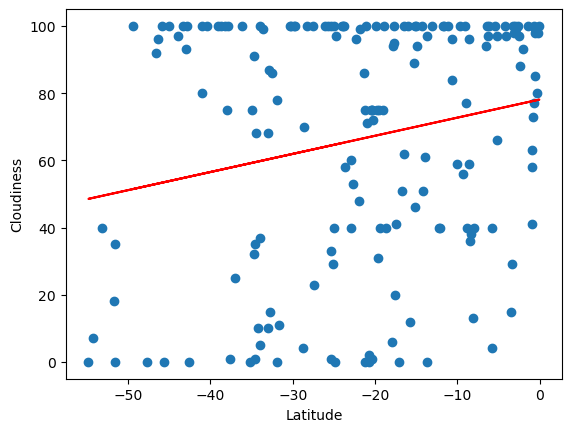

In [34]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_cloudiness = southern_hemi_df['Cloudiness']
slope, intercept, r, p, se = linregress(southern_lat, southern_cloudiness)


fig, ax = plt.subplots()
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.plot(southern_lat, slope * southern_lat + intercept, color= 'red')
ax.scatter(southern_lat, southern_cloudiness)
print(f"The r-value is: {r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14962644932494407


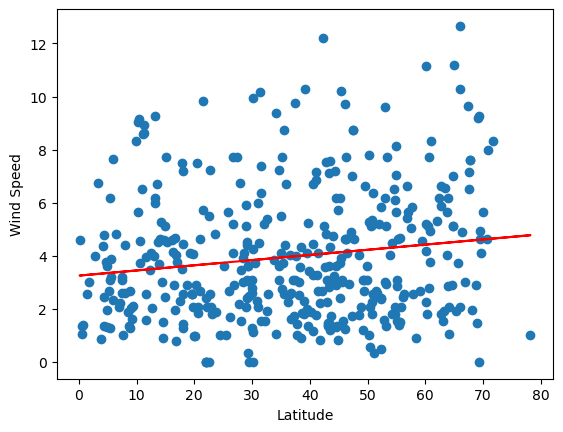

In [38]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_windiness = northern_hemi_df['Wind Speed']
slope, intercept, r, p, se = linregress(north_lat, north_windiness)


fig, ax = plt.subplots()
print(f"The r-value is: {r}")
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_windiness)

The r-value is: -0.35302290342524506


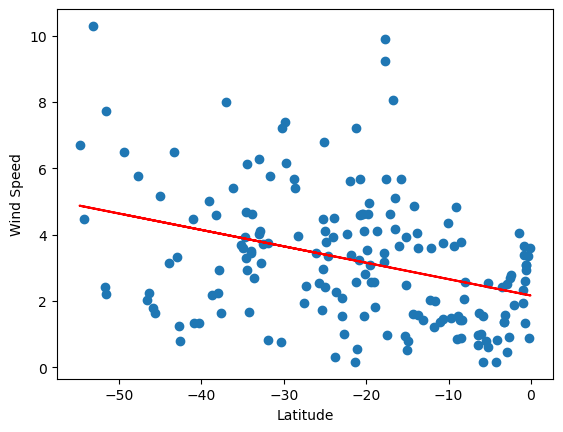

In [36]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_windspeed = southern_hemi_df['Wind Speed']
slope, intercept, r, p, se = linregress(southern_lat, southern_windspeed)


fig, ax = plt.subplots()
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.plot(southern_lat, slope * southern_lat + intercept, color= 'red')
ax.scatter(southern_lat, southern_windspeed)
print(f"The r-value is: {r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE